# Overlaying glottis images and accessing their metadata for a better diagnosis

## Introduction

In this project a dataset of glottis medical pictures is explored. This particular dataset contains 100 images in `.png`, for each image there is a respective segmented mask, also in `.png` and a metadata file `.meta`. The future aim of this project is to train a dataset of glottis pictures with `Machine Learning` algorithms to help determine the patient status and help speed up the diagnosis process.

In [1]:
import os 
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio as io
from PIL import Image
import skimage.io
import cv2
from scipy import misc

# TASK 3

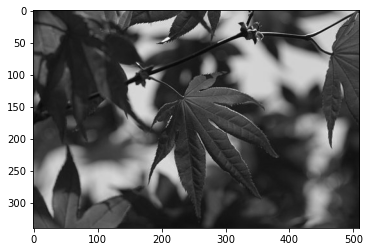

In [2]:
import imageio as io
from PIL import Image
import skimage.io #this is changed from skimage to skimage.io in Windows 10
import cv2

## load image with different libraries
img_path = str(r'C:\Users\pizza\Desktop\DSSS\Homework2\leaves.jpg')
#img = io.imread(img_path)
#img = Image.open(img_path)
#img = skimage.io.imread(img_path)
#img = cv2.imread(img_path); img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# load image as grayscale
img = skimage.io.imread(img_path, as_gray=True)
plt.imshow(img, cmap='gray')


#####LIGHTNESS 

img_light=io.imread(img_path)

img_light[:] = np.max(img_light,axis=-1,keepdims=1)/2+np.min(img_light,axis=-1,keepdims=1)/2


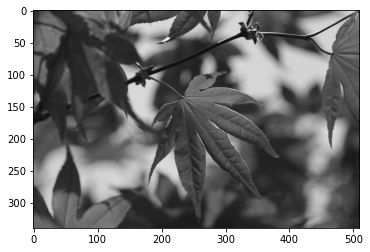

In [10]:

######### AVERAGE METHODE #####

img_avg = io.imread(img_path)
#photo_data = misc.imread(img_path)
x,y,z=img_avg.shape ## where z is the RGB dimension### Method block begin 
img_avg[:] = img_avg.mean(axis=-1,keepdims=1) 
### Method Block ends plt.figure(figsize=(10,20))
plt.imshow(img_avg)

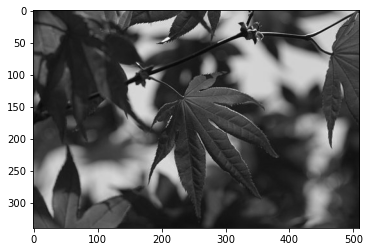

In [11]:
######### LUMINOSITY METHOD #########
img_lum = io.imread(img_path)
W = [0.21,0.72,0.07] # weights
W_mean = np.tensordot(img_lum,W, axes=((-1,-1)))[...,None]

img_lum[:] = W_mean.astype(img.dtype)
plt.imshow(img_lum)

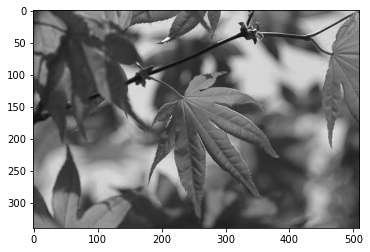

In [13]:
#####LIGHTNESS 

img_light=io.imread(img_path)

img_light[:] = np.max(img_light,axis=-1,keepdims=1)/2+np.min(img_light,axis=-1,keepdims=1)/2
plt.imshow(img_light)

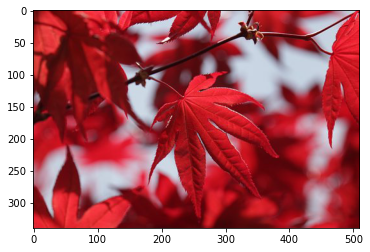

In [9]:
img = io.imread(img_path)
plt.imshow(img)

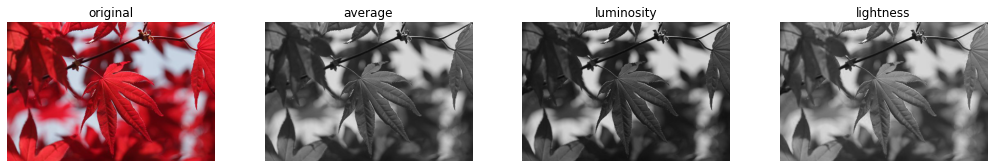

In [3]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))
ax1.axis("off"); ax2.axis("off"); ax3.axis("off");ax3.axis("off");ax4.axis("off")
ax1.imshow(img_ref);ax2.imshow(img_avg); ax3.imshow(img_lum); ax4.imshow(img_light)
fig.tight_layout(pad=5.0)
ax1.title.set_text("original"); ax2.title.set_text("average"); ax3.title.set_text("luminosity"); ax4.title.set_text("lightness")


# new_img.save("new.png","PNG")

In [4]:
def psnr(img1, img2):
    #mean squared error:
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return "MSE is zero"
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

In [5]:
print(psnr(img_ref, img_avg))
print(psnr(img_ref, img_lum))
print(psnr(img_ref, img_light))
print(psnr(img_ref, img_ref))


27.804391879186504
28.138482511756557
27.60718138322941
MSE is zero
